# A-Mechanism (non-linear displacemet)
### Based on D'Ayala and Speranza, 2002/2003

Authors: Aline Bönzli and Caroline Heitmann, EESD EPFL

This notebok was created during our work on our Master Theses at the EESD lab at EPFL and serves the visualization of an out-of-plane (OOP) mechanism of an unreinforced masonry (URM) wall. All calculations should be vefified by the user and the authors do not take any responsibility for application and interpretation of the results of this notebook. 

## Introduction

This notebook can be used to calculate the push-over curve for a basic out-of-plane A-mechanisms of a masonry structure subject to seismic action. The difference between this notebook and the linearized A-mechanism is that the displacements are calculated in more detail in this notebook allowing to decrease the lever arm of the horizontal forces and giving a more exact calculation. It can however be seen in the results that this only influences very thick walls.

First, the geometric and material characteristics will be defined, then depending on these inputs, the displacement capacity for out-of-plane accelerations will be returned in form of a push-over graph. 

This is a generic case of a wall with one row of windows of the same size. To apply it to a specific building, make sure to adapt the code where needed.

In [1]:
### NOTHING TO BE CHANGED
# Import the basic packages for the notebook
import numpy as np # Numerical library
import pandas as pd # Data analysis library
import matplotlib.pyplot as plt # Plotting library
import matplotlib.ticker as maticker 

## 1. Define the wall geometry

The chosen example for this code is a plain wall moving out of plane around its bottom axis. A sketch with the main dimensions is shown below:

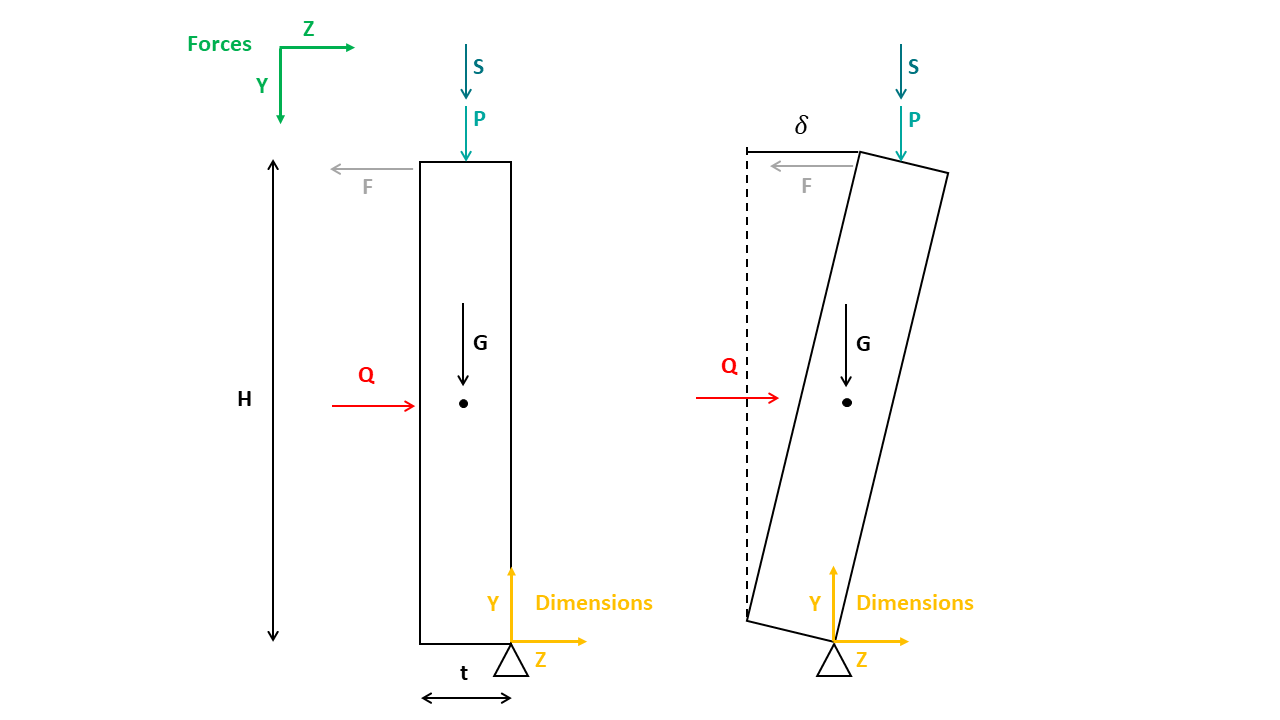

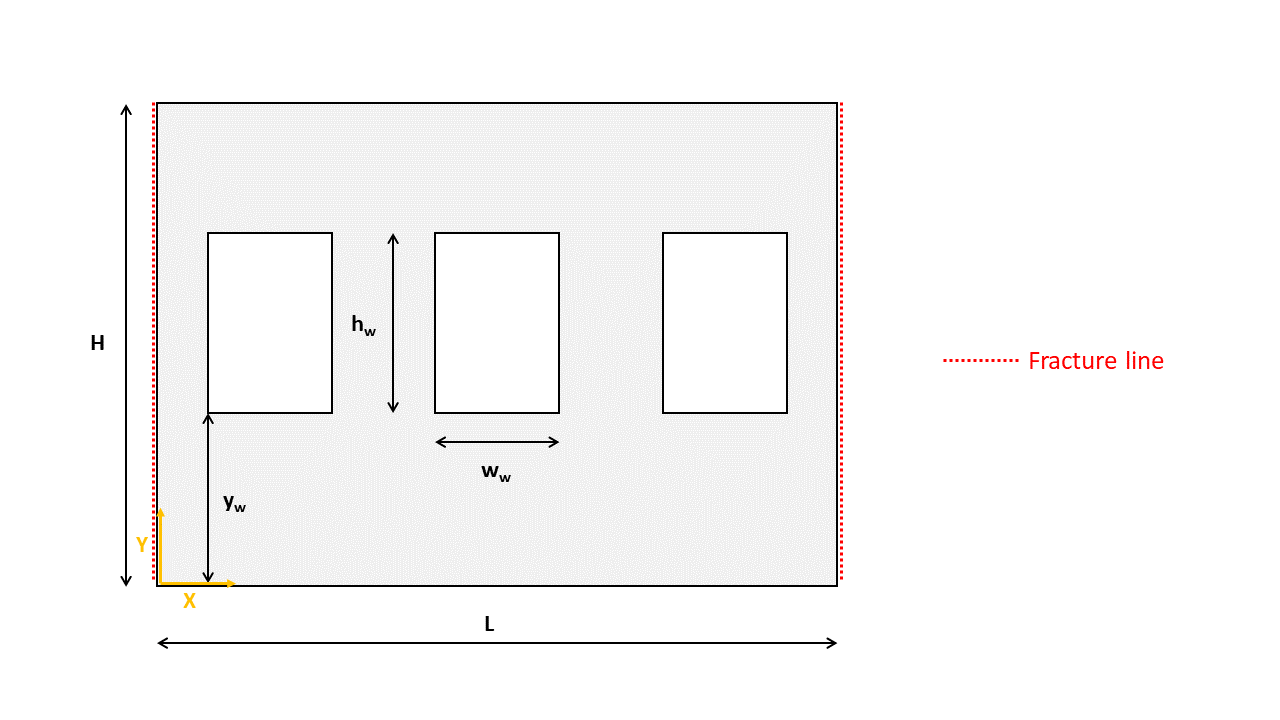

In [2]:
### NOTHING TO BE CHANGED
from IPython.display import Image, display
display(Image(filename='Mec_A_1.PNG'))
display(Image(filename='Mec_A_2.PNG'))

This block is used to define the geometry of the wall and the windows within. You can adapt the input to use the notebook 
for your case.

In [3]:
## Wall geometry
H = 5               # Total height of wall, y-direction [m]
L = 10              # Total length of wall, x-direction [m]
t = 0.7             # Thickness of wall,    z-direction [m]

## Window geometry
h_w = 0.5           # Height of window [m]
w_w = 0.5           # Width of window [m]
y_w = 3             # Vertical distance from the bottom of the wall to bottom lefthand corner of window [m]
                    # (y-coordinate of the windows left bottom corner)
n_w = 3             # Number of windows

## Slab information
max_delta = t/2     # Maximum displacement, when the slab and wall lose connection such that the friction is no longer
                    # restraining the wall [m]

## 2. Define material properties

This block is used to define the material properties of the wall and the connecting slab. You can adapt the input to use the notebook 
for different cases.

In [4]:
rho_masonry = 1800          # Density of the masonry [kg/m^3]
g = 9.81                    # Gravitational acceleration [m/s^2]
mu_f = 0.3                  # Friction coefficient between slab and masonry wall

## 3. Define the loads and forces

In this paragraph, the loads and forces acting on the wall are defined. The following block defines the vertical load on top of the wall coming from a slab (S) or a superimposed wall (P). Note that the S-load will be used to directly calculate the restraining force due to friction between the wall and the slab. If you want to introduce a vertical load that does not produce any friction, please use the P-load.

In [5]:
P = 100000                   # vertical load on top of the wall [N]
S = 200000                   # slab load acting on top of the wall [N]

## 4. Calculation of overturning moment

This paragraph calculates the pushover curve for the given case. Nothing needs to be changed here.

Text(0.5, 1.0, 'a - Displacement')

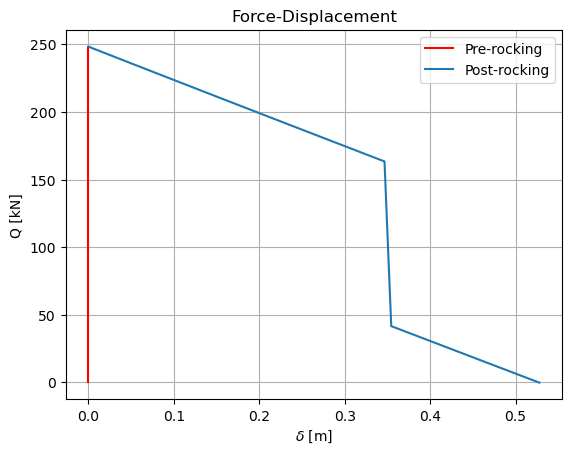

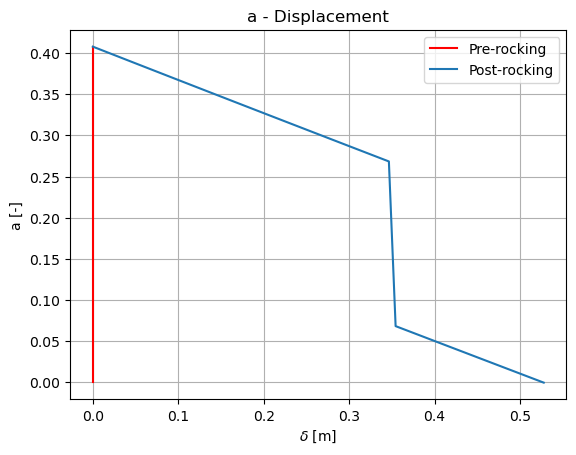

In [6]:
### NOTHING TO BE CHANGED

# This function calculates the center of gravity of a wall with windows in the y-direction
def cog_fun():
    # H             = Total height of wall, y-direction [m]
    # L             = Total length of wall, x-direction [m]
    # t             = Thickness of wall,    z-direction [m]
    # h_w           = Height of window [m]
    # w_w           = Width of window [m]
    # y_w           = Vertical distance from the bottom of the wall to bottom lefthand corner of window [m]
    # n_w           = Number of windows

    A_w = n_w*h_w*w_w     # Total area of windows [m^2]
    A = H*L               # Area of wall [m^2]
    ybar = H/2            # Centroid of wall, assuming rectangular profile with constant thickness [m]
    ybar_w = y_w+h_w/2    # Centroid of window, assuming rectangular profile with constant thickness [m]
    
    COG_y = ((A*ybar)-(A_w*ybar_w))/(A-A_w)

    return COG_y


# This function calculates the maximum horizontal force that can be applied to the wall at a given deformation delta 
# to stay in an equilibrium state
def Q_eq_fun(theta): 
    # theta        = Angle of rotation of the wall [rad]
    # t            = Thickness of the wall [m]
    # H            = Total height of the wall [m]
    # COG_y_wall   = Y-coordinate of the center of gravity of the wall [m]
    # P            = Vertical load on top of the wall [N]
    # S            = Slab load acting on top of the wall [N]
    # G            = Gravity load of the wall (self-weight) [N]
    # F            = Friction force from slab acting on top of the wall [N]
    delta = (t/2) - d_1*np.sin(beta-theta) # dispacement at center point of top edge of the wall [m]
    
    l_a_vert_top = d_1 * np.cos(beta-theta) # Vertical lever arm for horizontal forces applied at the top centre of 
                                            # the wall [m]
    l_a_vert_cog = d_2 * np.cos(gamma-theta)# Vertical lever arm for horizontal forces applied at the centre of 
                                            # gravity of the wall [m]
    l_a_hor_top = d_1 * np.sin(beta-theta)  # Horizontal lever arm for vertical forces applied at the top centre of 
                                            # the wall [m]
    l_a_hor_cog = d_2 * np.sin(gamma-theta) # Horizontal lever arm for vertical forces applied at the centre of 
                                            # gravity of the wall [m]                                        
    if delta < max_delta:
        # Maximum earthquake force for equilibrium [N]
        Q_eq=(F*l_a_vert_top+(P+S)*l_a_hor_top+G*l_a_hor_cog)/l_a_vert_cog 

    else: 
        # Maximum earthquake force for equilibrium [N]
        Q_eq=((P+S)*l_a_hor_top+G*l_a_hor_cog)/l_a_vert_cog 
    
    return np.array([Q_eq , delta])


## Derived wall properties
A_net = H*L-n_w*h_w*w_w      # Net area of wall / Area of wall without windows [m^2]
V_net = A_net*t              # Net volume of wall / Volume of wall without windows [m^3]
COG_y_wall = cog_fun()       # Center of gravity of the complete wall in y-direction [m]
d_1 = np.sqrt(H**2+(t/2)**2) # Diagonal to middle of upper edge of the wall [m]
beta = np.arcsin(t/2/d_1)    # Angle between diagonale d_1 and vertical edge of block [rad]
d_2 = np.sqrt(COG_y_wall**2+(t/2)**2) # Diagonal to the center of gravity of the wall [m]
gamma =np.arcsin(t/2/d_2)    # Angle between diagonale d_2 and vertical edge of block [rad]

## Derived loads and forces
G = rho_masonry*V_net*g      # gravity load of the wall (self-weight) [N]
F = mu_f*S                   # friction force from slab acting on top of the wall [N]

## Maximum earthquake force to start rocking

val = Q_eq_fun(0)            
Q_max = val [0]              # Maximum seismic load [N]
alpha_max=Q_max/G            # Portion of gravity load [-]

## Plot force-displacement relationship of the overturning of the wall
theta_vals = np.linspace(0,np.pi/2,1000)
vals = np.zeros((np.size(theta_vals),2))

for i in range(np.size(vals,0)): # Calculates the corresponding force for the given displacement
    vals[i]=Q_eq_fun(theta_vals[i])

q_vals = vals[:,0]
delta_vals =vals[:,1]
# Transformation to only display values up to failure
q_end = q_vals[q_vals<=0]
q_vals = q_vals[q_vals>=0]
q_vals = np.append(q_vals,q_end[0])
delta_vals = delta_vals[: np.size(q_vals)]

plt.figure()
plt.grid()
plt.plot([0,0],[0,Q_max/1000],label='Pre-rocking',color='red')
plt.plot(delta_vals,q_vals/1000,label='Post-rocking')
plt.legend()
plt.xlabel('$\delta$ [m]')
plt.ylabel('Q [kN]')
plt.title('Force-Displacement')



# Plot acceleration-displacement relationship of the overturning of the wall, where a is a factor multiplied
# by gravitational acceleration
alpha_vals = q_vals / G  # Transformation to alpha value
plt.figure()
plt.grid()
plt.plot([0,0],[0,alpha_max],label='Pre-rocking',color='red')
plt.plot(delta_vals,alpha_vals,label='Post-rocking')
plt.legend()

plt.xlabel('$\delta$ [m]')
plt.ylabel('a [-]')
plt.title('a - Displacement')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ec31d9b1-b904-46de-90ff-bc7ed068e5e5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>